## Pandas

In this module we will be learning about pandas, the python library for representing dataframes, tabular, 2-d structures that represent datasets.

We will talk about

Series: 1-dimensional representations of data

Dataframes: Basic concepts and manipulation of pandas 2-d data structures

Advanced dataframes: more advanced data frame manipulation

### Pandas Series

Pandas provides a Series object that is very similar to a numpy array, but with some additional functionality. In this lesson, we will learn about pandas Series and how to work with them.

In [1]:
import pandas as pd

### Creating Series

Series can be created from a list or a numpy array:



In [2]:
series = pd.Series([100, 43, 26, 17])
type(series)

pandas.core.series.Series

In [4]:
series



0    100
1     43
2     26
3     17
dtype: int64

### Series Properties

A series contains several additional pieces of meta-information that a list does not:

    -an index, a way to reference items in the series. This is the numbers 0-3 in our example above

    -a dtype, the data type of the elements in the series, this is int64 in our example above, and the dtype was inferred from the data we used.

Pandas has several main datatypes we will work with:

    int: integer, whole number values
    float: decimal numbers
    bool: true or false values
    object: strings
    category: a fixed set of string values
    a name, an optional human-friendly name for the series

Our series doesn't have a name, but we can give it one:

In [5]:
series.name = 'My Numbers'
series

0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64

In [6]:
series.index


RangeIndex(start=0, stop=4, step=1)

In [7]:
series.dtype


dtype('int64')

Notice what happens when we create a series of other data types:



In [8]:
pd.Series([3, 2, 4.5])


0    3.0
1    2.0
2    4.5
dtype: float64

In [9]:
pd.Series(['a', 'b', 'c'])


0    a
1    b
2    c
dtype: object

We can convert between data types with the .astype method.



In [10]:
string_series = pd.Series([3, .5, 4.5, 6]).astype('str')
string_series

0    3.0
1    0.5
2    4.5
3    6.0
dtype: object

In [16]:
import numpy as np
numbers = np.arange(100)
numbers = pd.Series(numbers)
numbers.astype("float")   #change the data type with this 

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
24    24.0
25    25.0
26    26.0
27    27.0
28    28.0
29    29.0
      ... 
70    70.0
71    71.0
72    72.0
73    73.0
74    74.0
75    75.0
76    76.0
77    77.0
78    78.0
79    79.0
80    80.0
81    81.0
82    82.0
83    83.0
84    84.0
85    85.0
86    86.0
87    87.0
88    88.0
89    89.0
90    90.0
91    91.0
92    92.0
93    93.0
94    94.0
95    95.0
96    96.0
97    97.0
98    98.0
99    99.0
Length: 100, dtype: float64

In [21]:
%timeit numbers * numbers

107 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
numbers.head()  # defaults to five with no argument

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [15]:
numbers.tail()   # defaults to five with no argument

95    95
96    96
97    97
98    98
99    99
dtype: int64

In [24]:
numbers_mask = numbers % 2 == 0
numbers_mask.head()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [26]:
numbers[numbers_mask].head()

0    0
2    2
4    4
6    6
8    8
dtype: int64

### Vectorized Operations

Like numpy arrays, pandas series are vectorized by default, for example, we can easily use the basic arithmatic operators to manipulate every element in the series.

In [17]:
series + 1


0    101
1     44
2     27
3     18
Name: My Numbers, dtype: int64

In [18]:
series / 2


0    50.0
1    21.5
2    13.0
3     8.5
Name: My Numbers, dtype: float64

Comparison operators also work:



In [20]:
series == 17
# Here you are creating a mask

0    False
1    False
2    False
3     True
Name: My Numbers, dtype: bool

### Series Methods

Series have a number of useful methods that we can use for various sorts of manipulations and transformations.

We will first look at .any, to check if any value in the series is true, and .all, to check if every value in the series is true. Both will return a boolean value whether or not the condition is met.

For example, we could check to see if there are any negative values in the series like this:

In [27]:
series[series == 17].any()  #Are there any values of 17 in series?

True

In [35]:
series[series < 0].any()     ###Why does all() return True here?

False

In [36]:
series[series > 0].all()

True

### Value Counts

.value_counts is another handy method that will quickly give us a count of the unique values in a series:

In [37]:
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts()


a    4
b    2
c    1
d    1
dtype: int64

In [40]:
print(series.values)
print(series.index)
print(series)   #These properties don't change the original array

[100  43  26  17]
RangeIndex(start=0, stop=4, step=1)
0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64


### Check if each value is in a set of values

The .isin method can be used to tell whether or not each value in the series is in a set of known values. For example, if we have a series of letters, we could use .isin to tell whether each letter is a vowel:



In [41]:
vowels = list('aeiou')
letters = list('abcdefghijk')
letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
dtype: object

In [42]:
letters_series.isin(vowels)  ## Now we have a boolean mask

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

### Descriptive Statistics

Pandas has a number of methods that can be used to view summary statistics about our data. The table below (taken from here) provides a summary of some of the most commonly used methods.

In [43]:
series.describe()   ### Ummmmm, Yes!  You CAN use this with strings, too.

count      4.000000
mean      46.500000
std       37.260345
min       17.000000
25%       23.750000
50%       34.500000
75%       57.250000
max      100.000000
Name: My Numbers, dtype: float64

In [44]:
{
    'count': series.count(),
    'sum': series.sum(),
    'mean': series.mean()
}

{'count': 4, 'sum': 186, 'mean': 46.5}

### Applying a function to a series

Sometimes there are more complicated operations that we want to apply to series' elements that go beyond what we can do with the vectorized operations. In this case we can define a function that handles a single value and use the .apply method to apply the function to each element.

In [45]:
def even_or_odd(n):
    '''
    A function that takes a number and returns a string indicating whether the passed number is even or odd.

    >>> even_or_odd(3)
    'odd'
    >>> even_or_odd(2)
    'even'
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

In [46]:
# .apply takes in a function definition into its parens
series.apply(even_or_odd)

0    even
1     odd
2    even
3     odd
Name: My Numbers, dtype: object

### Vocab Moment

def add_one(x):      #function definition
    return x + x
    
add_one(5)  #"calling add_one" or "executing a function" or  sending in 5

add_one     #function object 
    
series.apply(add_one)  #passing the add_one function to .apply method

In [47]:
series.apply(len)  #This works with strings!

TypeError: object of type 'int' has no len()

### If you have defined a function to work on a single thing, you can pass it to  .apply and apply it to a series

It is also very common to see lambda functions used along with .apply. We could re-write the above example with a lambda function like so:

In [49]:
def even_or_odd(num):
    if num % 2 == 0:
        return "even"
    else:
        return "odd"
even_or_odd(10)

'even'

In [50]:
# Or you could do it with a lambda in one line using .apply
series.apply(lambda n: 'even' if n % 2 == 0 else 'odd')


0    even
1     odd
2    even
3     odd
Name: My Numbers, dtype: object

### Vectorized String Operations

In addition to arithmetic, pandas also provides us a way to vectorize string manipulation.

For example, imagine we have a series of strings and we wanted to lowercase all of them. We know we could use .apply for this:

In [51]:
strings = ['hello', 'Codeup', 'stUdenTs']
string_series = pd.Series(strings)
string_series.apply(lambda s: s.lower())

0       hello
1      codeup
2    students
dtype: object

But pandas series provide an even simpler way:



In [53]:
string_series.str.lower()


0       hello
1      codeup
2    students
dtype: object

In [ ]:
string_series.str.replace("a", "z")

In [54]:
prices = pd.Series(["$8.99", "$4.99"])
prices.str.replace("$","")

0    8.99
1    4.99
dtype: object

Once we access the .str property, we can treat the resulting value as if it were a string. In our case, we called the .lower method, which will convert all the strings in the series to lower case.



### Subsetting and Indexing

Like numpy arrays, we can use a series of boolean values to subset a series.

For example, to find the values greater than 40:



In [55]:
series


0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64

In [57]:
print(series > 40)           #mask
print(series[series > 40])   #mask applied


0     True
1     True
2    False
3    False
Name: My Numbers, dtype: bool
0    100
1     43
Name: My Numbers, dtype: int64


### Transforming Numerical to Categorical Values

We can use the cut function from pandas to put numerical values into discrete bins. (binning for classification algorithms)

We can either specify the number of bins to create, and pandas will create bins with an even size, or we can specify the bins themselves:

In [58]:
s = pd.Series(list(range(15)))
s

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

In [61]:
pd.cut(s, 3)    #our observations are in bins or ranges now
#Default non-inclusive on the left and inclusive on the right

0     (-0.014, 4.667]
1     (-0.014, 4.667]
2     (-0.014, 4.667]
3     (-0.014, 4.667]
4     (-0.014, 4.667]
5      (4.667, 9.333]
6      (4.667, 9.333]
7      (4.667, 9.333]
8      (4.667, 9.333]
9      (4.667, 9.333]
10      (9.333, 14.0]
11      (9.333, 14.0]
12      (9.333, 14.0]
13      (9.333, 14.0]
14      (9.333, 14.0]
dtype: category
Categories (3, interval[float64]): [(-0.014, 4.667] < (4.667, 9.333] < (9.333, 14.0]]

In [62]:
pd.cut(s, [-1, 3, 12, 16])
#Default non-inclusive on the left and inclusive on the right

0      (-1, 3]
1      (-1, 3]
2      (-1, 3]
3      (-1, 3]
4      (3, 12]
5      (3, 12]
6      (3, 12]
7      (3, 12]
8      (3, 12]
9      (3, 12]
10     (3, 12]
11     (3, 12]
12     (3, 12]
13    (12, 16]
14    (12, 16]
dtype: category
Categories (3, interval[int64]): [(-1, 3] < (3, 12] < (12, 16]]

### Plotting

Pandas series also have some methods built in to quickly visualize the data. It's worth noting that these methods are useful shortcuts, but anything you do with these could also be accomplished by using methods and functions from matplotlib directly.

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

By simply calling the .plot method, pandas will use the default plot it thinks fits the data:



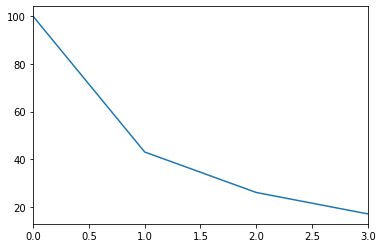

In [65]:
series.plot()


We can also use specific types of visualizations like this:



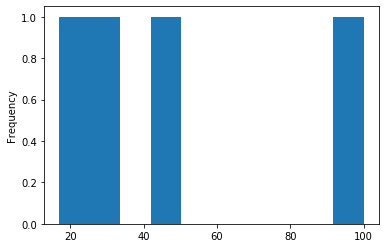

In [66]:
series.plot.hist()


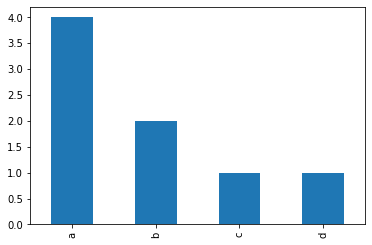

In [67]:
# The .value_counts method returns a series, so we can call .plot on the resulting series
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar()

Text(0.5, 1.0, 'Example Pandas Visualization')

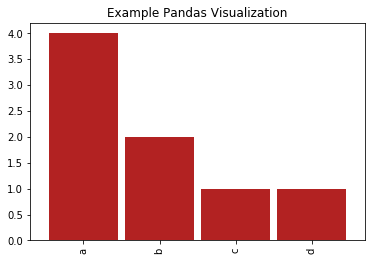

In [68]:
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar(color='firebrick', width=.9)
plt.title('Example Pandas Visualization')